**IMPORTS**

In [10]:
import sys
from tensorflow import keras
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout

**1-Layer CNN**

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Accuracy = 64.330
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_21 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 8192)              0         
                                                                 
 dense_14 (Dense)            (None, 128)               1048704   
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                    

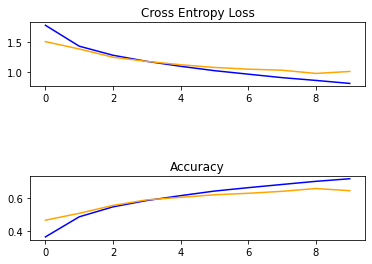

In [9]:
# loading train and test dataset
def load_dataset():
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY
 
# scaling pixels
def pixel_prep(train, test):
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	return train_norm, test_norm
 
def summary(history):
	# plot loss
	pyplot.subplot(311)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(313)
	pyplot.title('Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

    
def define_model(): #1 Layer
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

	# load dataset
trainX, trainY, testX, testY = load_dataset()
	# prepare pixel
trainX, testX = pixel_prep(trainX, testX)
	# define model
model = define_model()
	# fit model
history = model.fit(trainX, trainY, epochs=10, batch_size=64, validation_data=(testX, testY), verbose=0)
	# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print('Accuracy = %.3f' % (acc * 100.0))
	# plots of accuracy per epoch
summary(history) 
	# structure of the model
model.summary()

**1,2 and 3-layer CNN comparing**

170508288/170498071 [==============================] - 6s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Accuracy = 66.270
Accuracy = 69.640
Accuracy = 70.620


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


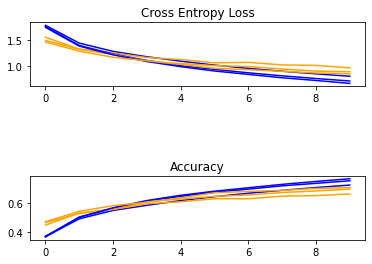

In [3]:
# loading train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY
 
# scaling pixels
def pixel_prep(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# plot diagnostic learning curves
def summary(history):
	# plot loss
	pyplot.subplot(311)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(313)
	pyplot.title('Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	#filename = sys.argv[0].split('/')[-1]
	#pyplot.savefig(filename + '_plot.png')
	#pyplot.close()

    
def define_model_1(): #1 Layer
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

def define_model_2():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

def define_model_3():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model


#RUN the model

	# load dataset
trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
trainX, testX = pixel_prep(trainX, testX)
	# define model
model_1 = define_model_1()
model_2 = define_model_2()
model_3 = define_model_3()

  
	# fit model
history1 = model_1.fit(trainX, trainY, epochs=10, batch_size=64, validation_data=(testX, testY), verbose=0)
history2 = model_2.fit(trainX, trainY, epochs=10, batch_size=64, validation_data=(testX, testY), verbose=0)
history3 = model_3.fit(trainX, trainY, epochs=10, batch_size=64, validation_data=(testX, testY), verbose=0)
	# evaluate model
_, acc1 = model_1.evaluate(testX, testY, verbose=0)
_, acc2 = model_2.evaluate(testX, testY, verbose=0)
_, acc3 = model_3.evaluate(testX, testY, verbose=0)
print('Accuracy = %.3f' % (acc1 * 100.0))
print('Accuracy = %.3f' % (acc2 * 100.0))
print('Accuracy = %.3f' % (acc3 * 100.0))
	# learning curves
summary(history1) 
summary(history2)
summary(history3)

**1-Layer CNN with Tanh activation**

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Accuracy = 66.960
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_23 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 8192)              0         
                                                                 
 dense_16 (Dense)            (None, 128)               1048704   
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                    

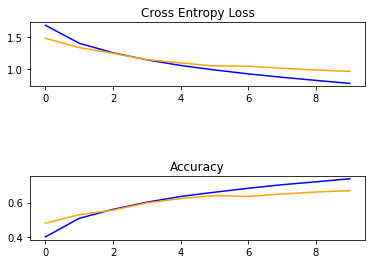

In [10]:
# loading train and test dataset
def load_dataset():
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY
 
# scaling pixels
def pixel_prep(train, test):
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	return train_norm, test_norm
 
def summary(history):
	# plot loss
	pyplot.subplot(311)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(313)
	pyplot.title('Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

    
def define_model(): #1 Layer
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='tanh', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='tanh', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='tanh', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

	# load dataset
trainX, trainY, testX, testY = load_dataset()
	# prepare pixel
trainX, testX = pixel_prep(trainX, testX)
	# define model
model = define_model()
	# fit model
history = model.fit(trainX, trainY, epochs=10, batch_size=64, validation_data=(testX, testY), verbose=0)
	# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print('Accuracy = %.3f' % (acc * 100.0))
	# plots of accuracy per epoch
summary(history) 
	# structure of the model
model.summary()

**Showing Classes of CIFAR10**

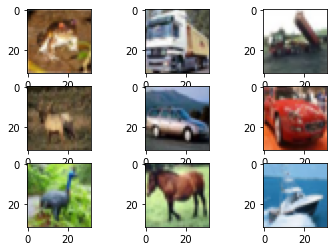

In [2]:
from matplotlib import pyplot
from keras.datasets import cifar10
(trainX, trainy), (testX, testy) = cifar10.load_data()
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(trainX[i])
pyplot.show()

**1-Layer CNN with Adam Optimizer**

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Accuracy = 65.730
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               1048704   
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                    

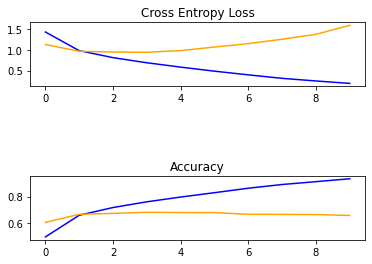

In [9]:
# loading train and test dataset
def load_dataset():
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY
 
# scaling pixels
def pixel_prep(train, test):
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	return train_norm, test_norm
 
def summary(history):
	# plot loss
	pyplot.subplot(311)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(313)
	pyplot.title('Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

    
def define_model(): #1 Layer
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	opt = Adam(lr=0.001)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

	# load dataset
trainX, trainY, testX, testY = load_dataset()
	# prepare pixel
trainX, testX = pixel_prep(trainX, testX)
	# define model
model = define_model()
	# fit model
history = model.fit(trainX, trainY, epochs=10, batch_size=64, validation_data=(testX, testY), verbose=0)
	# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print('Accuracy = %.3f' % (acc * 100.0))
	# plots of accuracy per epoch
summary(history) 
	# structure of the model
model.summary()

3-layer CNN with Dropout Regularization

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Accuracy = 70.630
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_27 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_28 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_29 (Conv2D)          (None, 16, 16, 64)        36928     
                                    

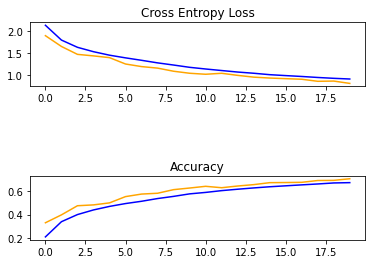

In [14]:
# loading train and test dataset
def load_dataset():
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY
 
# scaling pixels
def pixel_prep(train, test):
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	return train_norm, test_norm
 
def summary(history):
	# plot loss
	pyplot.subplot(311)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(313)
	pyplot.title('Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')



def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.3))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.3))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.3))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.3))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

  
	# load dataset
trainX, trainY, testX, testY = load_dataset()
	# prepare pixel
trainX, testX = pixel_prep(trainX, testX)
	# define model
model = define_model()
	# fit model
history = model.fit(trainX, trainY, epochs=20, batch_size=64, validation_data=(testX, testY), verbose=0)
	# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print('Accuracy = %.3f' % (acc * 100.0))
	# plots of accuracy per epoch
summary(history) 
	# structure of the model
model.summary()